# Análisis térmico y de transferencia de calor de proceso de enfriamiento en extrusión de tubos plásticos

El presente cuaderno muestra el procedimiento del método numérico para solucionar los problemas del canal de enfriamiento en proceso de extrusión y el enfriamiento de un fluido que viaja por tubería. 
Método numérico para cálculo de la temperatura y otras variables térmicas de un proceso de extrusión de tubería
Desarrollado por Juan Sebastian León Becerra 
Abril 4 de 2022 
Cliente: Extrucol 

el area es:  0.008356573626695776 mm2
LA VEL es:  0.3747377990360564 m/s
EL tiempo es:  32.02239013749821 s
El número de elementos es: 240.0
El número de nodos es: 241
1.615079222916169
finito
[[ 3.61507922 -1.          0.         ...  0.          0.
   0.        ]
 [-1.          3.61507922 -1.         ...  0.          0.
   0.        ]
 [ 0.         -1.          3.61507922 ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  3.61507922 -1.
   0.        ]
 [ 0.          0.          0.         ... -1.          3.61507922
  -1.        ]
 [ 0.          0.          0.         ...  0.         -1.
   3.61507922]]
242


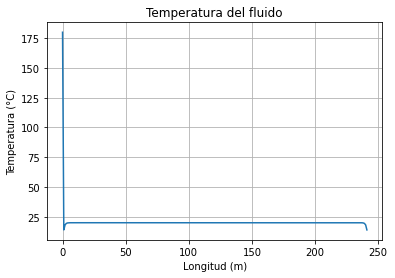

In [18]:
import numpy as np 
import matplotlib.pyplot as plt # Libería para graficar de Python
"""
Propiedades del material a extruir 
"""
material="HDPE"
rho_s= 958 # (kg/m3) densidad del PET guess value
k_s= 0.51 #W/(m.K) Conductividad térmica del material
Cp_s= 1900 # J/Kg-K Calor específico 
alpha_s=k_s/(rho_s*Cp_s) #   Difusividad térmica del material

"""
Datos del proceso
"""
m_dot= 3 #Flujo de masa Kg/s
D_ext= 219.1/1000 #Diámetro exterior de la tubería (m)
esp= 12.9/1000 # Espesor de la tubería (m)
N_pis= 4 # Número de tanques de enfriamiento
T_ini=180 # Temperatura incial (°C)
T_fin=35 # Temperatura final (°C)
Long=12 #Longitud tubo extruido

"""
Cálculos
"""
Area=np.pi*(D_ext**2-(D_ext-2*esp)**2)/4 #Área de la sección transversal en m^2
P=np.pi*D_ext
Vel=m_dot/(rho_s*Area)
time=Long/Vel
print("el area es: ",Area,"mm2")
print("LA VEL es: ",Vel,"m/s")
print("EL tiempo es: ",time,"s")

"""
Calculando los coeficientes de convección. 
"""
T_air=20
h_air=4
h_water=100
h_c=h_air

"""
Método numérico
"""
dx= 0.05 # Longitud (m) del elemento diferencial 
Elem= Long/dx #Número de elementos
Nodos=int(Elem+1) #Número de nodos
print("El número de elementos es:",Elem)
print("El número de nodos es:",Nodos)
Temperaturas=np.zeros(Nodos) #Inicializar el vector de temperaturas nodales
A_m= np.zeros((Nodos,Nodos)) #Inicializar la matriz de coeficientes del vector temperaturas
F=np.zeros(Nodos)
coef=(h_c*P*dx**2)/(k_s*Area)
for i in range(len(Temperaturas)):
    if i==0:
        Temperaturas[i]=T_ini
        print(coef)
        A_m[0,0]=2+coef
        A_m[0,1]=-1
        F[0]=coef*T_air
        
    else:
        A_m[i,i]=2+coef
        A_m[i,i-1]=-1
        F[i]=coef*T_air
        if i==Nodos-1: 
            print("finito")
        else:
            A_m[i,i+1]=-1
           
    
solucion=np.matmul((np.linalg.inv (A_m)),F) 
Tempss=np.append(Temperaturas[0],solucion)
print(A_m)
print(np.size(Tempss))
# Datos para graficar
#longitud = np.arange(0.0, Nodos, dx)
fig, ax = plt.subplots()
ax.plot(Tempss)
ax.set(xlabel='Longitud (m)', ylabel='Temperatura (°C)',
       title='Temperatura del fluido')
ax.grid()
fig.savefig("test.png")
plt.show()



Se observa que la solución representada no es correcta, puesto que se asume estado estable, cuando las condiciones de contorno son variables en el tiempo. Se plantea un nuevo análisis del problema:

el area es:  0.008356573626695776 mm2
LA VEL es:  0.3747377990360564 m/s
EL tiempo es:  32.02239013749821 s
coef1 0.09302856323997132
coef2 513.9388235294117
finito


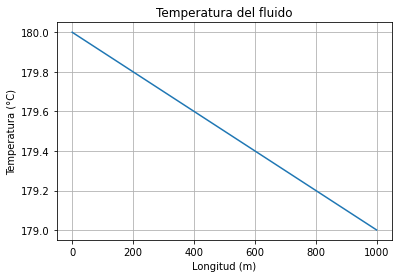

In [26]:
import numpy as np  # Libería numérica de Python
import matplotlib.pyplot as plt # Libería para graficar de Python
"""
Propiedades del material a extruir 
"""
material="HDPE"
rho_s= 958 # (kg/m3) densidad del PET guess value
k_s= 0.51 #W/(m.K) Conductividad térmica del material
Cp_s= 1900 # J/Kg-K Calor específico 
alpha_s=k_s/(rho_s*Cp_s) #   Difusividad térmica del material

"""
Datos del proceso
"""

m_dot= 3 #Flujo de masa Kg/s
D_ext= 219.1/1000 #Diámetro exterior de la tubería (m)
esp= 12.9/1000 # Espesor de la tubería (m)
N_pis= 4 # Número de tanques de enfriamiento
T_ini=180 # Temperatura incial (°C)
T_fin=35 # Temperatura final (°C)
Long=12 #Longitud tubo extruido

"""
Cálculos
"""
Area=np.pi*(D_ext**2-(D_ext-2*esp)**2)/4 #Área de la sección transversal en m^2
P=np.pi*D_ext
Vel=m_dot/(rho_s*Area)
time=Long/Vel
print("el area es: ",Area,"mm2")
print("LA VEL es: ",Vel,"m/s")
print("EL tiempo es: ",time,"s")

"""
Calculando los coeficientes de convección. 
"""
T_air=20
h_air=4
h_water=100

"""
Método numérico
"""
N=1000 #Número de divisiones
DeltaL=Long/N #(M)
Deltat=0.4*DeltaL**2/alpha_s#Fourier menor a 0.5, en este caso 0.4
Deltam=rho_s*Area*DeltaL
DeltaQ=Deltam*Cp_s*(T_fin-T_ini)
diftiempos=DeltaL/Vel
Temperaturas=np.zeros(N)
temps=np.zeros(N)
G=np.zeros(N)
coef1=(h_c*P*DeltaL**2)/(k_s*Area)
coef2=Deltam*Cp_s*DeltaL/(k_s*Area)
print("coef1",coef1)
print("coef2",coef2)

B_m= np.zeros((N,N))
for t in range(0,N):
    if t==0:
        Temperaturas[t]=T_ini
        temps[t]=0
        B_m[0,0]=-(2+coef1-coef2)
        B_m[0,1]=1-coef2
        G[0]=-coef1*T_air
    else: 
        temps[t]=t*DeltaL/Vel
        Temperaturas[t]=Temperaturas[t-1]-0.001
        B_m[t,t]=2+coef
        B_m[t,t-1]=-1
        if t==N-1: 
            print("finito")
        else:
            B_m[t,t+1]=-1
            G[t]=coef*T_air

# Datos para graficar
#longitud = np.arange(0.0, 500, 1)
fig, ax = plt.subplots()

ax.plot(Temperaturas)
ax.set(xlabel='Longitud (m)', ylabel='Temperatura (°C)',
       title='Temperatura del fluido')
ax.grid()
fig.savefig("test.png")
plt.show()


Los coeficientes de convección dependen de varios factores, entre ellos, las velocidades, tipos de fluido, diámetro de la tubería, rugosidad de la tubería y demás. 



# Análisis de transferencia de calor en tubería de diferente material 


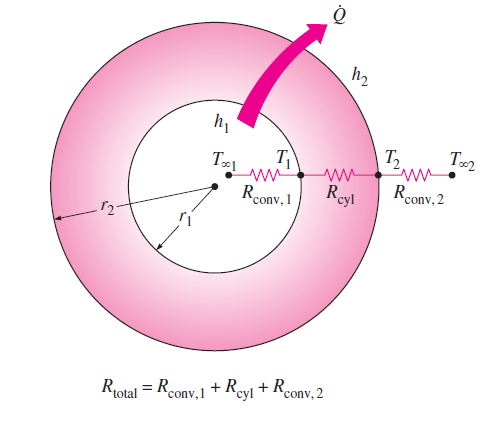


flujo no-laminar
78.04507765735882 Coeficiente de convección interior
2.245190796532794 Coeficiente de convección exterior


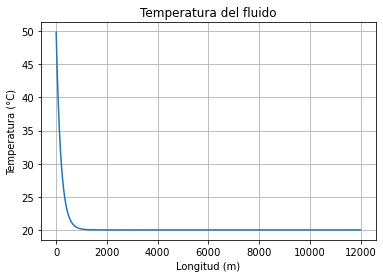

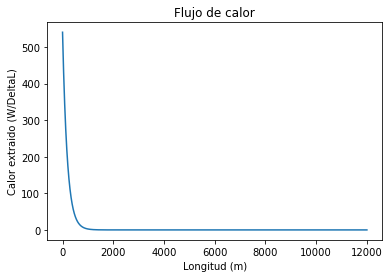

In [10]:
import numpy as np  # Librería numérica de Python
import matplotlib.pyplot as plt # Libería para graficar de Python


"""
INGRESAR DATOS
"""

"""
Propiedades geométricas
"""
D_int=250/1000 # (m) Diámetro interior en metros
D_ext= 283/1000 #(m) Diámetro exterior en metros
esp= (D_ext-D_int)/2 # (m) Espesor en metros
L_total= 12000 # Longitud en metros del tubo
DeltaL=1 # Tamaño de la particion
z=1 # (m) Profundidad de enterramiento (si aplica)
"""
Propiedades de los materiales
"""
material="HDPE" 
rho_s= 958 # (kg/m3) densidad del PET guess value
k_s= 0.51 # W/(m.K) Conductividad térmica del material
Cp_s= 1900 # J/Kg-K Calor específico 

""""
Información de referencia
"HDPE" 
rho_s= 958 # (kg/m3) densidad del PET guess value
k_s= 0.51 #W/(m.K) Conductividad térmica del material
Cp_s= 1900 # J/Kg-K Calor específico 
alpha_s=k_s/(rho_s*Cp_s) #   Difusividad térmica del material

"PP"
rho_s= 915 # (kg/m3) densidad del PET guess value
k_s= 0.27 #W/(m.K) Conductividad térmica del material
Cp_s= 1580 # J/Kg-K Calor específico 
alpha_s=k_s/(rho_s*Cp_s) #   Difusividad térmica del material
"""""

"""
Propiedades del fluido
"""
rho_f= 1000 # Kg/m3 
fluido= "Agua"
Cp_f= 4206 # J/(Kg-K)
K_f=0.568 # W/(m.K) Conductividad térmica
alpha_f=K_f/(rho_f*Cp_f) #   Difusividad térmica del material
m_dot= 0.8 # (Kg/s) Flujo másico 

T_in= 50 # (°C) 
mu= 0.00089 #(N.s/m2) Viscosidad absoluta o dinámica del fluido 0,0000174 para mayor precision usar Vogel-Fulcher-Tammann eqn:

"""
Propiedades del ambiente
"""
T_amb= 20 # (°C) Temperatura del aire
g=9.81 # (m/s2) Gravedad 
fluid="Aire"
mu_amb= 0.00018 #(N.s/m2) (Pa.s) Viscosidad absoluta o dinámica del fluido 
Beta=0.0033 #   Coeficiente del Grashoff aproximado como 1/T con T en Kelvin
Cp_amb= 1012 # J/(Kg-K) C
K_amb=0.0251 # W/(m.K) Conductividad térmica
k_soil= 0.07 #W/(m.K) Conductividad térmica del suelo (para tuberías enterradas)

"""
ESCOGER UN MÉTODO A:TUBO AEREO SIN RADIACIÓN B:TUBO ENTERRADO
"""
metodo="B" #Seleccion del metodo

"""
CALCULOS 
"""
Area_int= np.pi*D_int**2/4# (m2) area interior 
Area_trans=(np.pi/4)*(D_ext**2-D_int**2) # (m2) Area transversal 
Peri_int= D_int*np.pi # (m) Perímetro interior en metros
Peri_ext= D_ext*np.pi # (m) Perímetro exterior en metros

alpha_s=k_s/(rho_s*Cp_s) #   Difusividad térmica del material

V_dot=m_dot/rho_f # (m3/s) Flujo volumétrico 
vel_m=V_dot/Area_int # (m/s) velocidad de flujo 

"""
Cálculos transferencia de calor
1. Cálculo de coeficiente de convección interior. Flujo interior.
2. Cálculo de coeficiente Exteriro. Flujo natural exterior alrededor de un cilindro.
"""

#1. Cálculo de coeficiente de convección interior
Pr= mu*Cp_f/K_f #Número de Prandtl
Re=4*m_dot/(np.pi*D_int*mu)# Número de Reynolds 
if Re<2300: 
    print("flujo laminar, seleccione 1 para temperatura constante o 2 para flujo constante")
    L_inth=0.05*Re*Pr*D_int  #Longitud de entrada térmica
    tipo=input()
    if tipo=="2":
        Nu=4.36
    else:
        Nu=3.66+((0.0668*(D_int/L)*Re*Pr)/(1+0.04*((D_int/L)*Re*Pr)**(2/3))) 
else: 
    print("flujo no-laminar")
    Nu=0.023*(Re**(4/5))*(Pr**0.3) #Correlación de Dittus-Boelter
h_int=Nu*K_f/D_int #Coeficiente de convección interior    
print(h_int, "Coeficiente de convección interior")
  
#2. Cálculo de coeficiente de convección exterior 
#Correlación de Churchill y Chu PORCENTAJE DE ERROR, CREAR FACTOR DE AJUSTE "SEGURIDAD"
T_superf=40 
Pr_ext=mu_amb*Cp_amb/K_amb
Ra_D=Beta*g*(T_superf-T_amb)*Pr_ext*D_ext**3/(mu_amb**2)
Nu_ext=(0.6+(0.387*Ra_D**(1/6))/(1+(0.559/Pr_ext)**(9/16))**(8/27))**2 
h_ext=1*(Nu_ext*K_amb/D_ext) #el 0.9 es un factor de seguridad, se debe poner entre 0.9 y 1

print(h_ext, "Coeficiente de convección exterior")

#3 Cálculo de calor por enterramiento

S_soil=np.pi*2*L_total/(np.arccosh(2*z/D_ext))

"""
Cálculos térmicos globales y de TC
"""

nums=int(L_total/DeltaL)
Temperat=np.zeros(nums)
calor=np.zeros(nums)

for L in range(0,nums):
    if metodo=="A":
        R_total= 1/(h_int*np.pi*D_int*DeltaL)+np.log(D_ext/D_int)/(2*np.pi*DeltaL*k_s)+1/(h_ext*np.pi*D_ext*DeltaL)
        q_dot2=((T_in-T_amb)/R_total)
        T_out2=((-q_dot2+qrad)/(m_dot*Cp_f)+T_in)
        q_dot=m_dot*Cp_f*(T_out2-T_in) #Tasa de calor a extraer en KW
        Temperat[L]=T_out2
        T_in=T_out2
        calor[L]=q_dot2
    else: 
        R_total= 1/(h_int*np.pi*D_int*DeltaL)+np.log(D_ext/D_int)/(2*np.pi*DeltaL*k_s)+1/(S_soil*k_soil)
        q_dot2=((T_in-T_amb)/R_total)
        T_out2=((-q_dot2+qrad)/(m_dot*Cp_f)+T_in)
        q_dot=m_dot*Cp_f*(T_out2-T_in) #Tasa de calor a extraer en KW
        Temperat[L]=T_out2
        T_in=T_out2
        calor[L]=q_dot2
    

# Datos para graficar

fig, ax = plt.subplots()

ax.plot(Temperat)
ax.set(xlabel='Longitud (m)', ylabel='Temperatura (°C)',
       title='Temperatura del fluido')
ax.grid()
fig.savefig("test.png")
plt.show()

fig2, ax = plt.subplots()
ax.plot(calor)
ax.set(xlabel='Longitud (m)', ylabel='Calor extraido (W/DeltaL)',
       title='Flujo de calor')
plt.show()

In [ ]:


rad=0 #W/m2 
qrad= rad*Peri_ext*DeltaL/2 #(W/m (m. lineal de tubería))calor de radiacion solar el max teorico es 1361 
print(qrad)